# Linear Regression Model for Concrete Compressive Strength Prediction #

Compressive strength is the resistance of a material or structure to rupture under compressive forces. The compressive strength of concrete determines its performance during its service condition, making its study extremely important.

The characteristics of concrete depend on the types of ingredients used and their proportions. The main constituents of concrete are cement, water and aggregates in varying proportions, but some other materials can also be included in the mix to obtain the required strength and properties.

The dataset contains 9 variables:

1. Cement(kg/m^3): A binder, a chemical substance used in construction that fixes, hardens, and adheres to other materials to bind them together. Cement is rarely used alone, but rather to bond sand and aggregate.

2. Water(kg/m^3): The amount of water in concrete controls many properties, including: workability, compressive strength, permeability and tightness, durability and weathering, drying shrinkage, potential for cracking.

3. Fly Ash(kg/m^3): Fly ash is a fine powder that is a by-product of burning pulverized coal in electric power generation plants. This residue is created when mineral impurities in coal melt as they leave the combustion chamber.

4. Superplasticizer(kg/m^3): Superplasticizers are additives to concrete that are added to reduce the water content in a mix while maintaining flow properties.

5. Blast Furnace Slag(kg/m^3): Slag is formed in a blast furnace with molten iron from iron ore in the reducing presence of heated air, coke and limestone. The resulting molten slag and iron, once removed from the furnace, is subject to further processing to form crystalline aggregate or ground blast furnace slag.

6. Coarse Aggregate(kg/m^3): Coarse aggregates are any particles greater than 0.19 inch, but generally range between 3/8 and 1.5 inches in diameter. Gravels constitute the majority of coarse aggregate used in concrete with crushed stone making up most of the remainder.

7. Fine Aggregate(kg/m^3): Fine aggregates are essentially any natural sand particles won from the land through the mining process. Fine aggregates consist of natural sand or any crushed stone particles that are ¼” or smaller.

8. Age(days): The compressive strength of concrete increases with age, due to the cement hydration process that takes place over time.

9. Concrete Compressive Strength(MPa): The compression strength of concrete is a measure of the concrete's ability to resist loads which tend to compress it. It is measured by crushing cylindrical concrete specimens in compression testing machine.

In [1]:
## Wiping memory ##
rm(list = ls())
gc(full = TRUE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,604283,32.3,1290940,69,1290940,69.0
Vcells,1086374,8.3,8388608,64,1636915,12.5


In [2]:
## Loading packages ##
library(tidyverse)
library(ggplot2)
library(caret)
library(fastDummies)
library(readxl)
library(summarytools)
library(GGally)
library(lmtest)
library(glmnet)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'fastDummies' was built under R version 4.2.2"

Attaching package: 'summarytools'


The following object is masked from 'package:tibble':

    view


Warning message:
"package 'GGally' was built under R version 4.2.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked fr

### 1. Taking an initial look at the data

All variables are numeric and in the correct format/type.

In [3]:
# Read in the dataset
concrete = read_excel('C:/Users/Bruno/Documents/DS Projects/Concrete compressive strength/Datasets/Concrete_Data.xls')

In [4]:
# Checking the variable types and dataset dimension
str(concrete)

tibble [1,030 × 9] (S3: tbl_df/tbl/data.frame)
 $ Cement
(kg/m^3 mixture)            : num [1:1030] 390 315 324 540 390 ...
 $ Blast Furnace Slag
(kg/m^3 mixture): num [1:1030] 189 137 283 0 189 ...
 $ Fly Ash
(kg/m^3 mixture)           : num [1:1030] 0 0 0 0 0 0 0 0 0 0 ...
 $ Water
(kg/m^3 mixture)             : num [1:1030] 146 145 184 162 146 ...
 $ Superplasticizer
(kg/m^3 mixture)  : num [1:1030] 22 5.9 10.3 2.5 22 ...
 $ Coarse Aggregate
(kg/m^3 mixture)  : num [1:1030] 945 1130 943 1040 945 ...
 $ Fine Aggregate
(kg/m^3 mixture)    : num [1:1030] 756 745 660 676 756 ...
 $ Age
(day)                          : num [1:1030] 91 28 56 28 56 91 91 91 91 28 ...
 $ Concrete compressive strength
(MPa): num [1:1030] 82.6 81.8 80.2 80 79.4 ...


### 2. Data exploration

The column names in our dataset may be problematic so we will change them.

In [5]:
# Changing the column names
colnames(concrete) = c('Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate',
                      'Fine_Aggregate','Age','Concrete_Compressive_Strength')

#### 2.1 Data distribution

Let's first explore the distribution of each variable. We can see that the Age variable has a very skewed distribution which may be problematic, other variables distributions such as Blast Furnace Slag, Fly Ash and Superplasticizer may also present problems. 

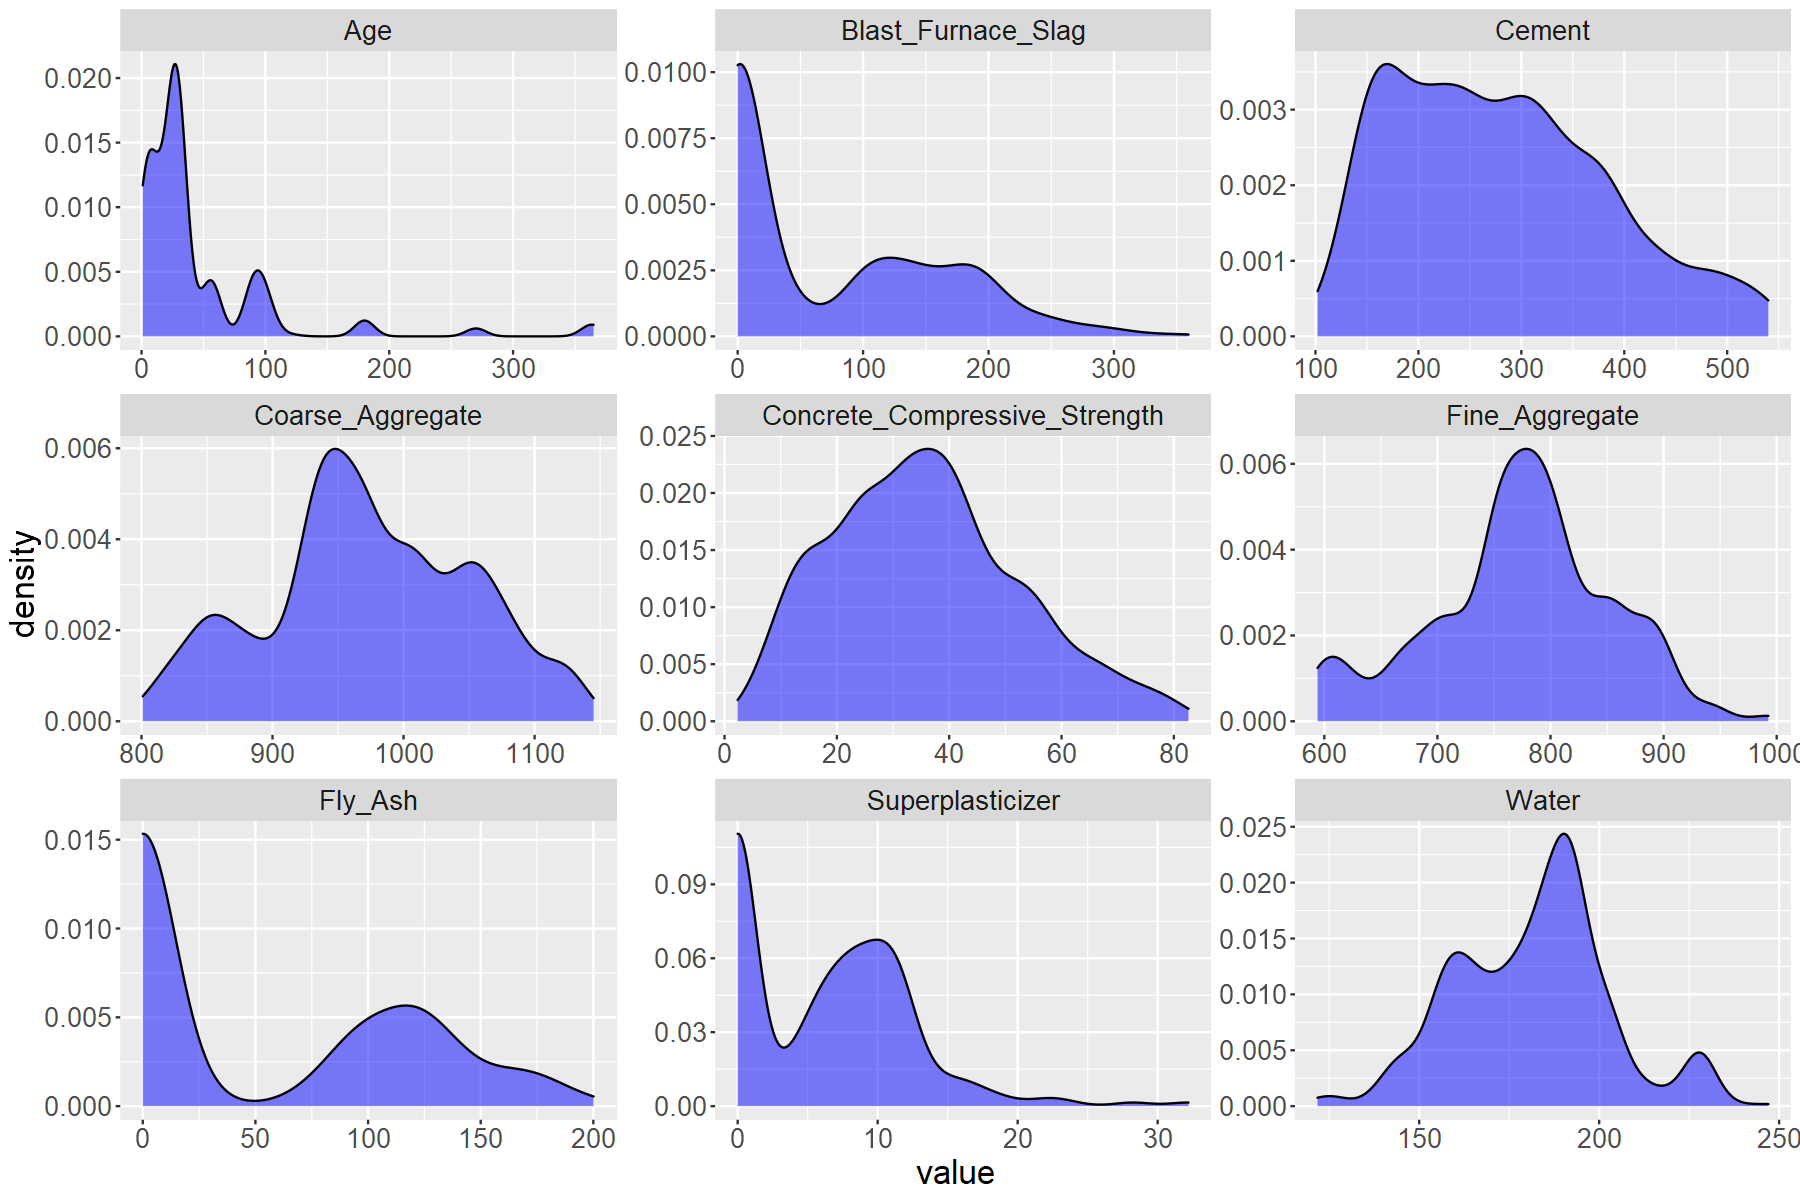

In [6]:
# Changing the plot size 
options(repr.plot.width=15, repr.plot.height=10)
# Plotting the distribution of each variable
pivot_df = pivot_longer(concrete, cols = colnames(concrete))
ggplot(pivot_df, aes(x=value)) + geom_density(fill='blue', alpha=0.5) + facet_wrap(facets = 'name', scales = 'free') + 
theme(text = element_text(size = 20))

We will also run the Shapiro-Wilk normality test on every variable.

As all of the p-values are less than 0.05 we are going to reject the null hypothesis as there is enough evidence that the data is not normally distributed.

In [7]:
# Running the normality test on the entire dataset
apply(concrete,2,shapiro.test)

$Cement

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.95896, p-value < 2.2e-16


$Blast_Furnace_Slag

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.81241, p-value < 2.2e-16


$Fly_Ash

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.76201, p-value < 2.2e-16


$Water

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.9804, p-value = 1.473e-10


$Superplasticizer

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.86605, p-value < 2.2e-16


$Coarse_Aggregate

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98245, p-value = 8.346e-10


$Fine_Aggregate

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98067, p-value = 1.843e-10


$Age

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.59071, p-value < 2.2e-16


$Concrete_Compressive_Strength

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97979, p-value = 9.023e-11



#### 2.2 Correlations

Now let's check the correlations between the variables and the target. Cement, Superplasticizer, Age and Water appear to have the strongest correlations to our target, so let's take a closer look at them.

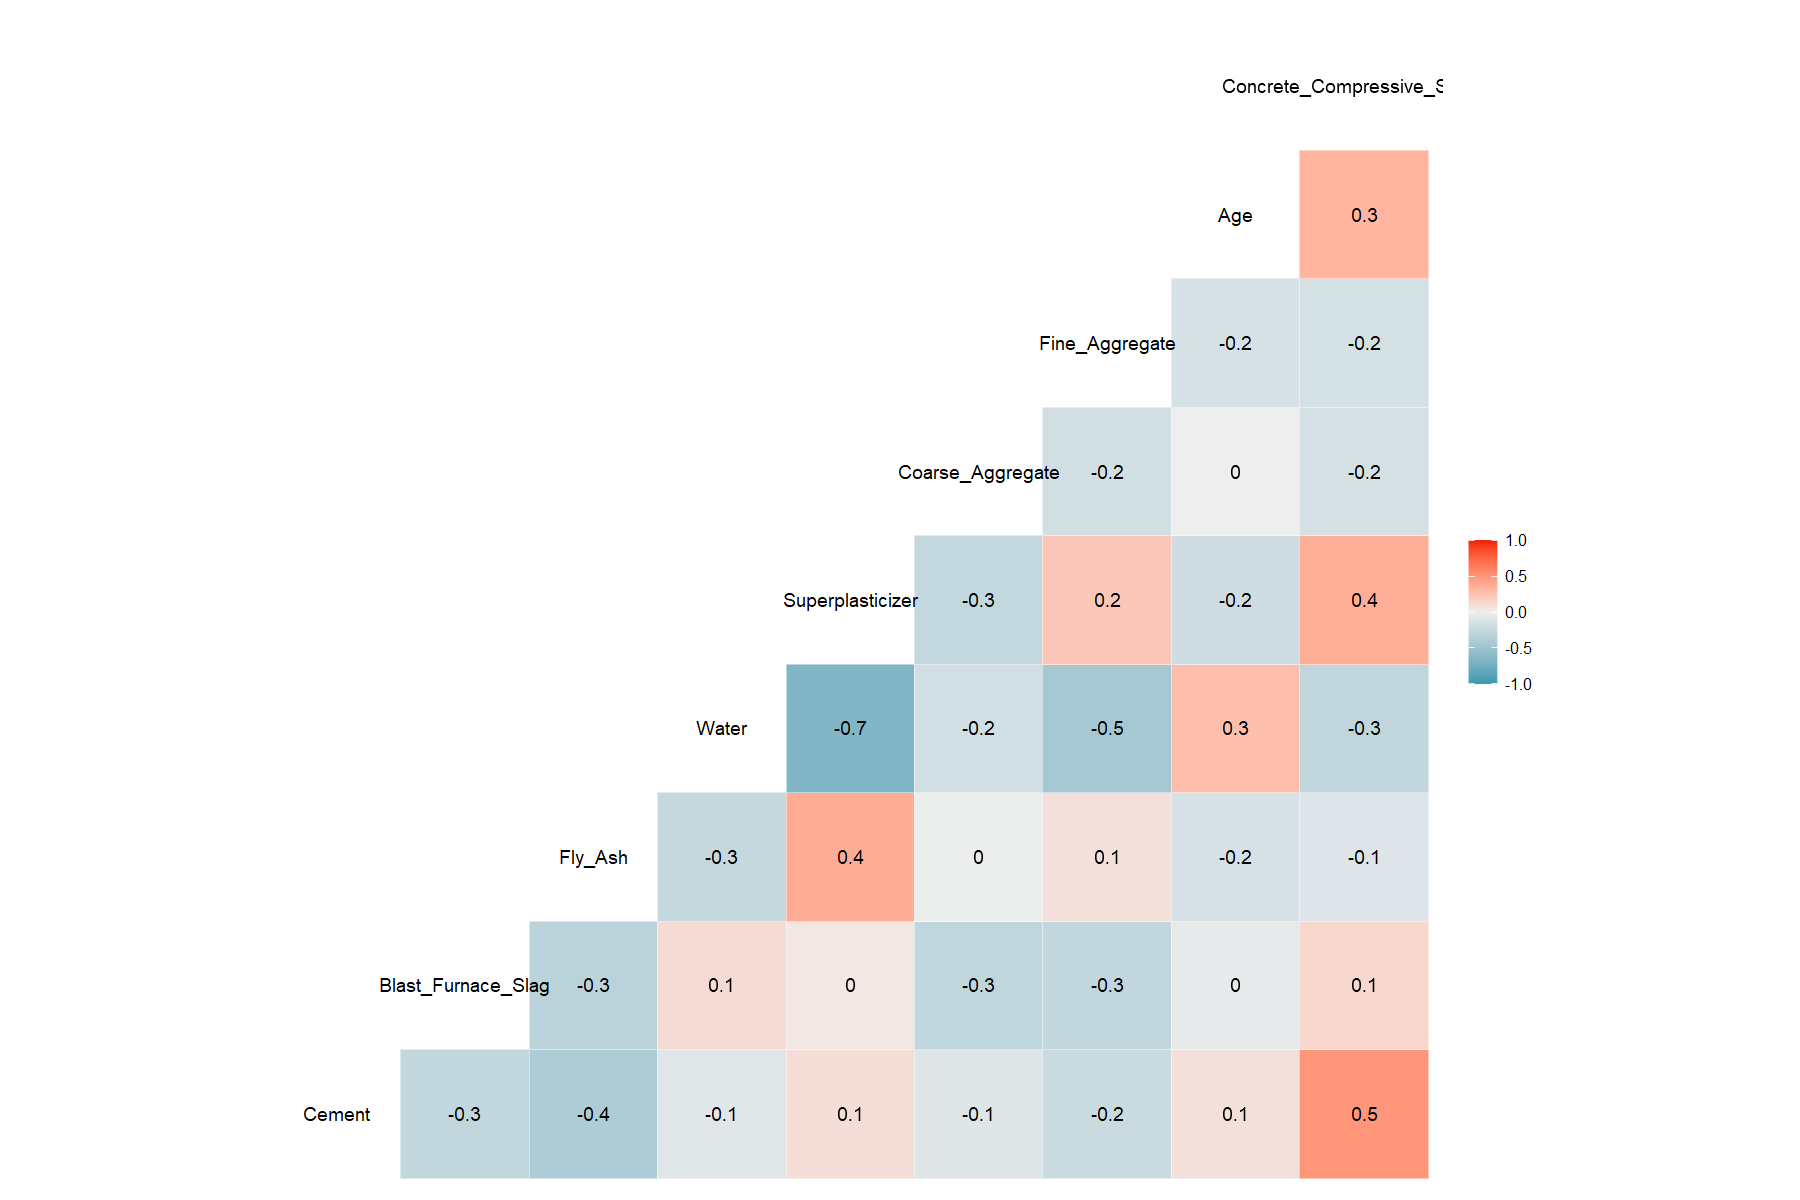

In [8]:
# Plotting the correlations
ggcorr(concrete, label = TRUE)

Age, cement and superplasticizer appear to have a positive correlation with the target, while water appears to have a negative correlation which is to be expected as superplasticizers is used to reduce the amount of water in the mix.

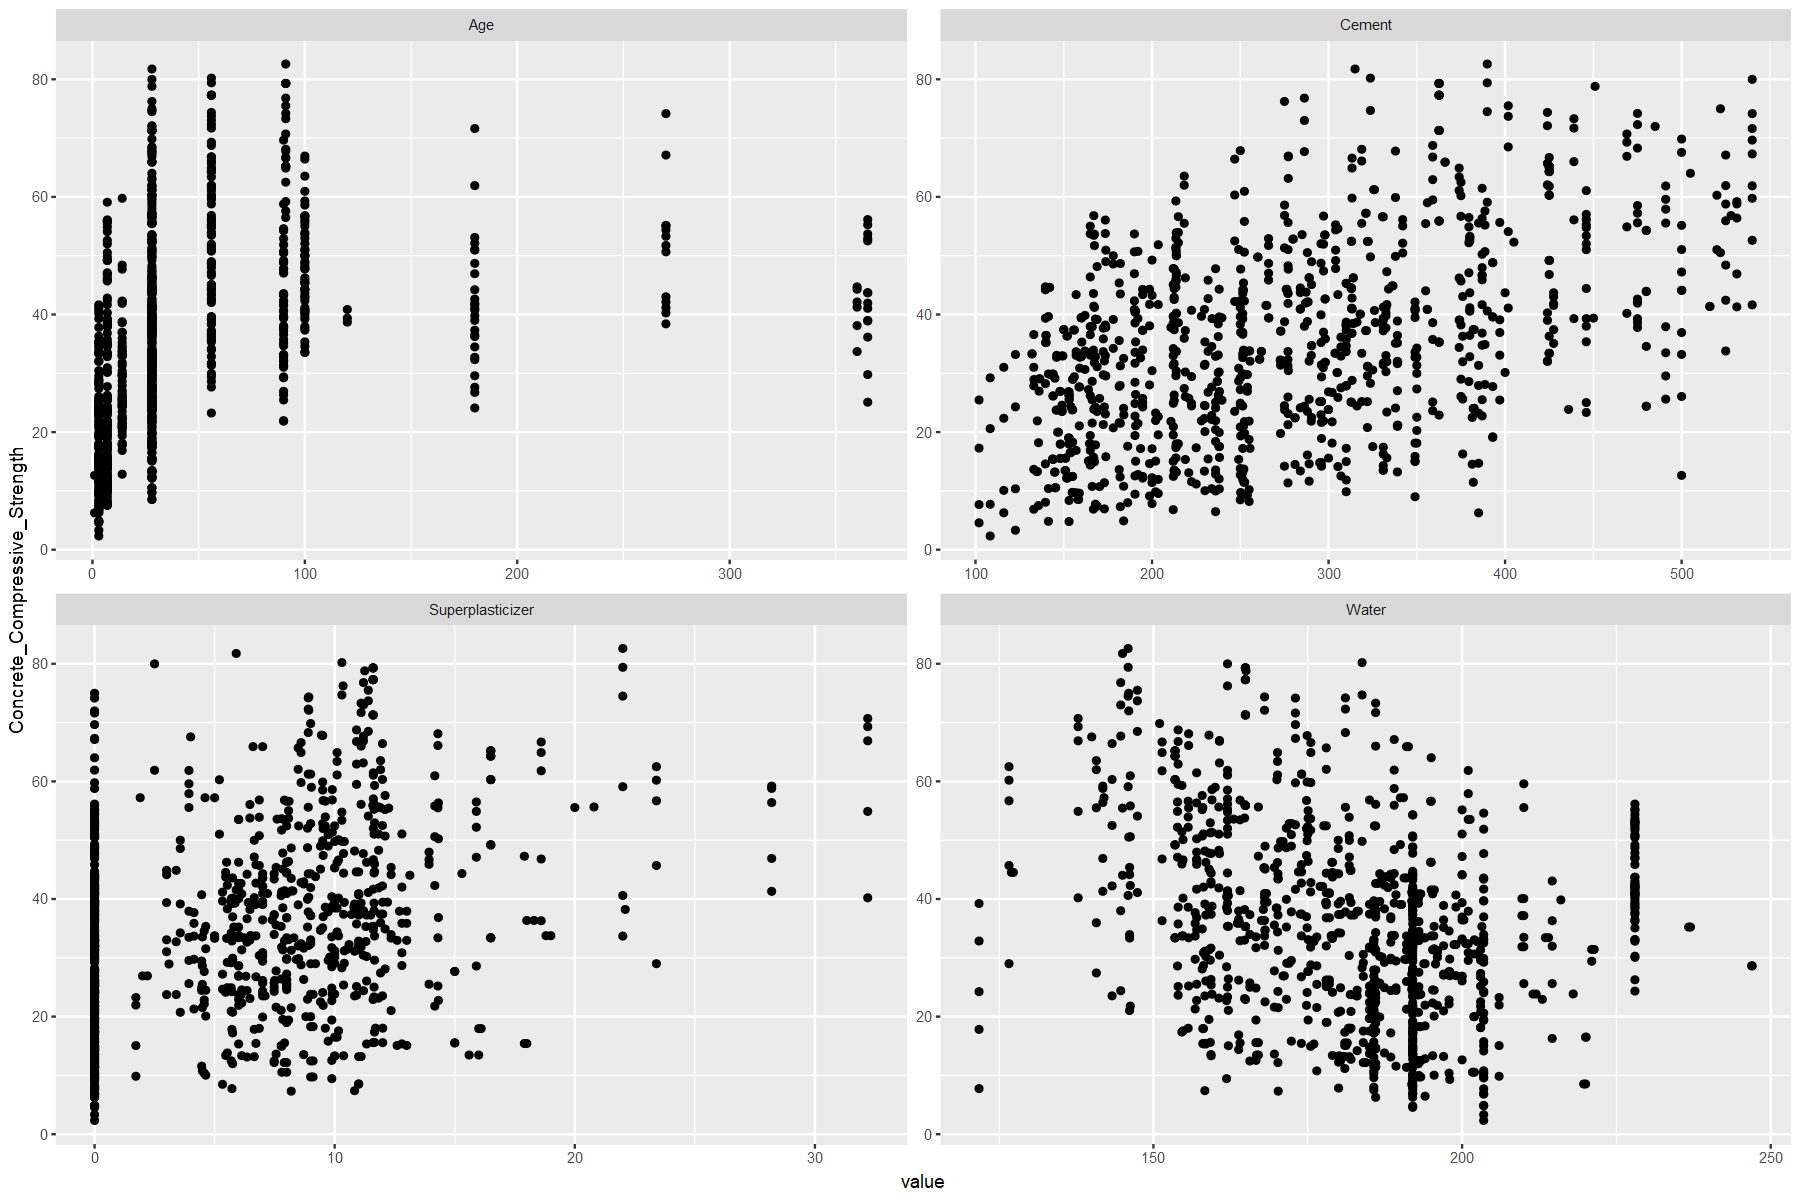

In [9]:
# Scatterplots of the strongest correlations
pivot_corr_df = pivot_longer(concrete %>% select(Cement,Water,Superplasticizer,Age,Concrete_Compressive_Strength), cols = 1:4)
ggplot(data = pivot_corr_df,aes(x=value,y=Concrete_Compressive_Strength)) + geom_point() + facet_wrap(facets = 'name',scales = 'free')

### 3. Data cleaning

We will check for missing values and duplicate values.

Our data has no missing values and as only 25 observations are duplicates, we will opt to remove them.

In [10]:
# Checking for missing values
sprintf('Number of missing values: %s',sum(is.na(concrete)))

# Checking for duplicate values
sprintf('Number of duplicate values: %s',sum(duplicated(concrete)))

[1] "Number of missing values: 0"

[1] "Number of duplicate values: 25"

In [11]:
# Removing the duplicate values
concrete = concrete[!duplicated(concrete),]

### 4. Initial modeling

Let's first check how the linear regression model will perform initially without any features engineering done on the dataset.

We will split the dataset into a train/test split with 20% of the observations for testing.

The linear model has a normal distribution of the residuals according to the shapiro-wilk test (p-value >= 0.5). However, it has a low R-squared value of 0.6.


In [12]:
# Setting a seed
set.seed(100)
# Splitting the dataset
part = createDataPartition(y = concrete$Concrete_Compressive_Strength, times = 1, p = 0.8, list = FALSE)

conc_train = slice(concrete,part)
conc_test = slice(concrete,-part)

In [24]:
# Running the linear regression
frl = Concrete_Compressive_Strength ~.
reg_base = lm(frl,conc_train)
summary(reg_base)
# Utilizing the shapiro-wilk test to check for the normality of the residuals
shapiro.test(resid(reg_base))


Call:
lm(formula = frl, data = conc_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.708  -6.438   0.420   6.742  35.210 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        14.365953  28.978886   0.496  0.62022    
Cement              0.104531   0.009378  11.147  < 2e-16 ***
Blast_Furnace_Slag  0.087650   0.011128   7.876 1.10e-14 ***
Fly_Ash             0.074167   0.013642   5.437 7.23e-08 ***
Water              -0.193687   0.043755  -4.427 1.09e-05 ***
Superplasticizer    0.295546   0.103533   2.855  0.00442 ** 
Coarse_Aggregate    0.006619   0.010290   0.643  0.52024    
Fine_Aggregate      0.003943   0.011690   0.337  0.73600    
Age                 0.112990   0.006098  18.529  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.23 on 796 degrees of freedom
Multiple R-squared:  0.6077,	Adjusted R-squared:  0.6038 
F-statistic: 154.1 on 8 and 796 DF,  p-value: < 2.2e-1


	Shapiro-Wilk normality test

data:  resid(reg_base)
W = 0.99632, p-value = 0.05659


We will now attempt to increase the models performance by performing some transformations on our variables, as their distributions may have been problematic.

### 5. Feature engineering

#### 5.1 BoxCox transformation

We will perform a BoxCox transformation as an attempt to get a better distribution of our data.

The transformation didn't have much impact in the Blast Furnace Slag, Fly Ash and Superplasticizer distributions. However, we can see that the Age distribution got much better.

In [14]:
# Performing the transformation on each dataset
preProcValues = preProcess(data.frame(conc_train), method = 'BoxCox')

boxcox_train = predict(preProcValues, data.frame(conc_train))
boxcox_test = predict(preProcValues, data.frame(conc_test))

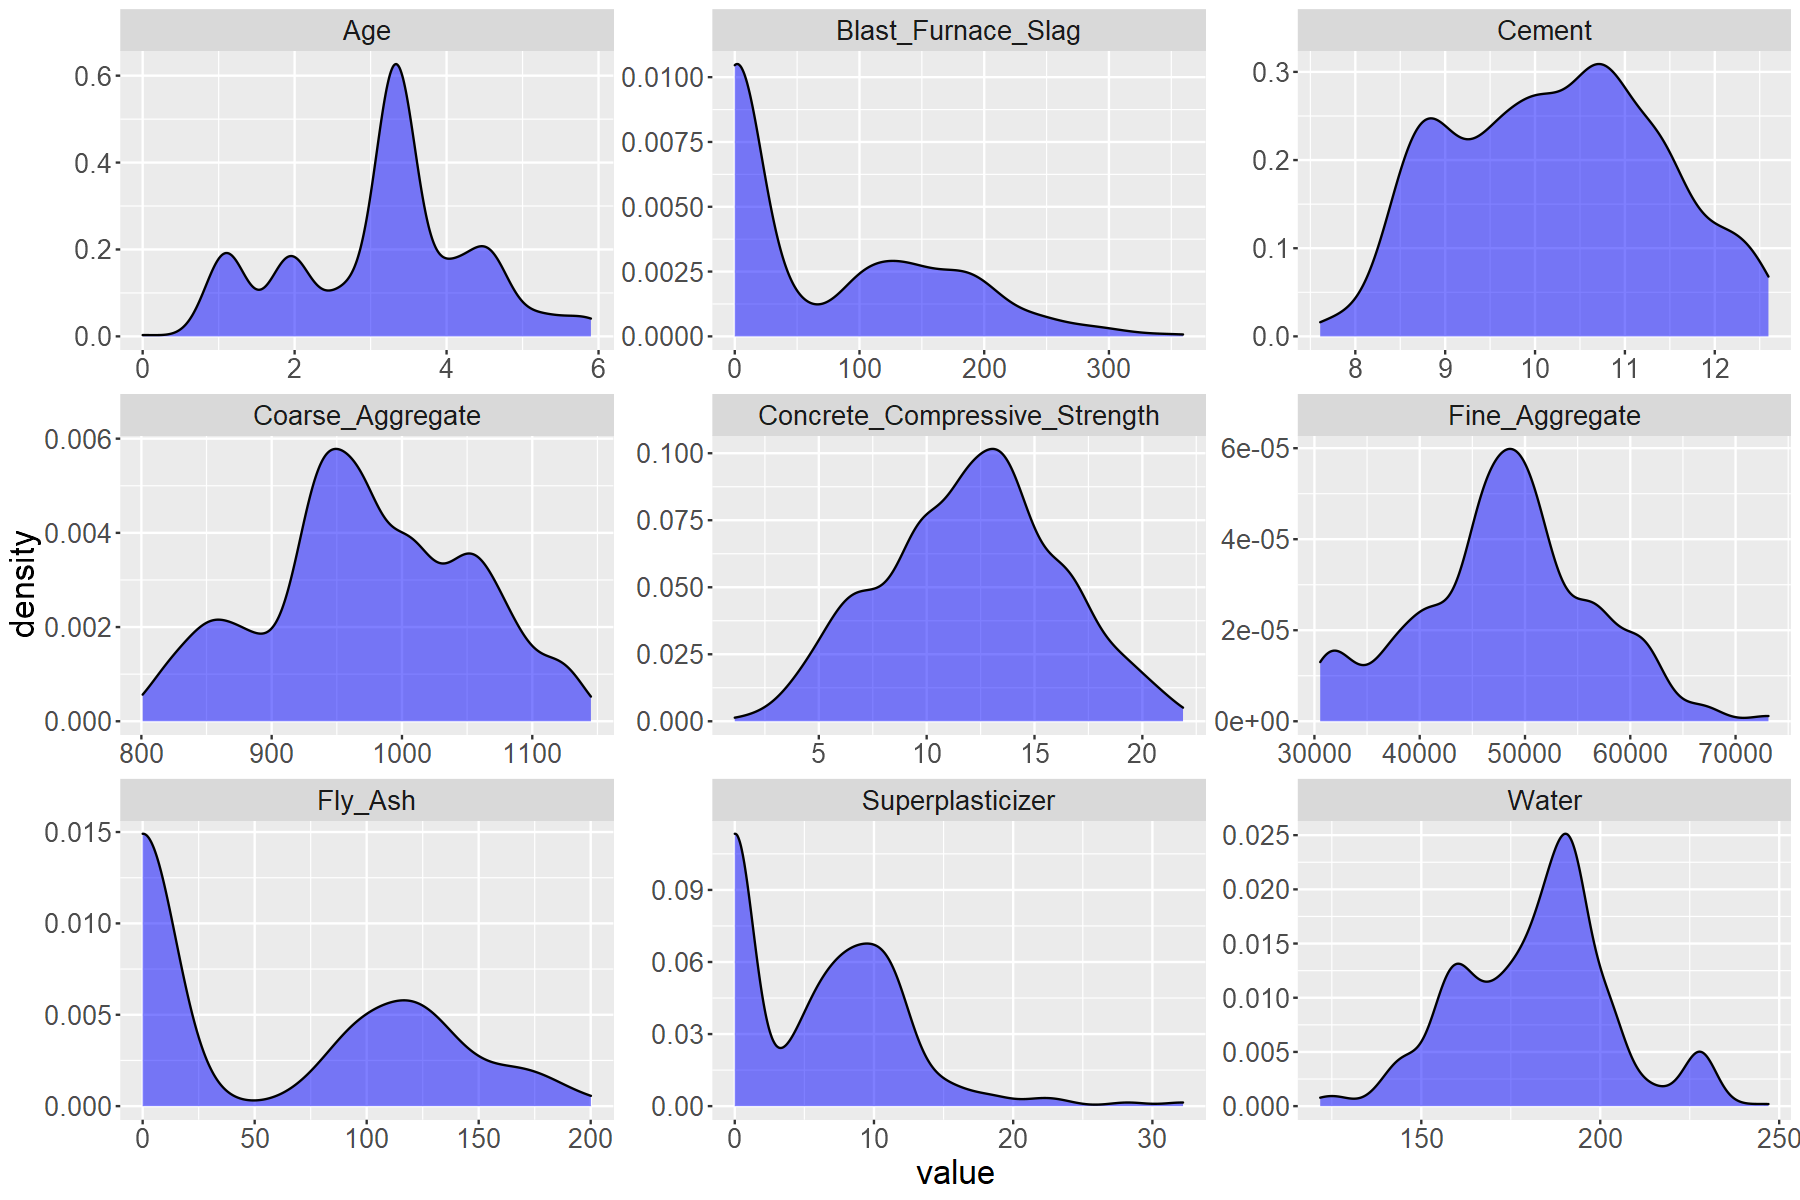

In [15]:
# Plotting the new distributions 
scaled_pivot_df = rbind(boxcox_train,boxcox_test)
scaled_pivot_df = pivot_longer(scaled_pivot_df, cols = colnames(scaled_pivot_df))
ggplot(scaled_pivot_df, aes(x=value)) + geom_density(fill='blue', alpha=0.5) + facet_wrap(facets = 'name', scales = 'free') +
theme(text = element_text(size = 20))

#### 5.2 Standardization

In addition to the BoxCox transformation, we will perform the standardization of our data in order to make it easier to interpret the intercept term and the regression coefficients.

In [16]:
# Performing the standardization on each dataset
preProcStd = preProcess(boxcox_train, method = c('center','scale'))

scaled_train = predict(preProcStd, boxcox_train)
scaled_test = predict(preProcStd, boxcox_test)

### 6. Modeling after feature engineering

Let's now check how the new model will perform after the transformations.

We can see an increase of 38% in the model's R-squared value compared to the initial model. However, we still have a couple of issues:

1. There are 3 variables in the model that show no statistical significance for our prediction (p-value >= 0.05): Superplasticizer, Coarse Aggregate and Fine Aggregate.

2. The distribution of the model's residuals is not normal (p-value < 0.05).

In [17]:
# Running the linear regression
frl_transf = Concrete_Compressive_Strength ~.
reg_transf = lm(frl_transf,scaled_train)
summary(reg_transf)
# Testing the normality of the residuals
shapiro.test(resid(reg_transf))


Call:
lm(formula = frl_transf, data = scaled_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30249 -0.23285  0.00396  0.24930  1.53753 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         8.776e-16  1.453e-02   0.000   1.0000    
Cement              7.601e-01  3.694e-02  20.580  < 2e-16 ***
Blast_Furnace_Slag  5.231e-01  3.771e-02  13.873  < 2e-16 ***
Fly_Ash             3.248e-01  3.340e-02   9.722  < 2e-16 ***
Water              -2.418e-01  3.542e-02  -6.824 1.75e-11 ***
Superplasticizer    2.469e-02  2.499e-02   0.988   0.3234    
Coarse_Aggregate    5.858e-02  2.982e-02   1.965   0.0498 *  
Fine_Aggregate      6.404e-02  3.555e-02   1.801   0.0721 .  
Age                 6.408e-01  1.486e-02  43.122  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4123 on 796 degrees of freedom
Multiple R-squared:  0.8317,	Adjusted R-squared:   0.83 
F-statistic: 491.6 on 8 a


	Shapiro-Wilk normality test

data:  resid(reg_transf)
W = 0.99534, p-value = 0.01536


We will try to fix those issues with more feature engineering.

### 7. Additional feature engineering

The variables that showed no statistical significance to the prediction will be removed from the model.

The distribution of the Fly Ash variable is our first suspicion as to what is causing the non-normality of the models residuals, so we will perform a discretization and then a one-hot encoding on it.

#### 7.1 Discretization 

We will discretize the Fly Ash variable into 3 categories.

In [18]:
# Performing the discretization
scaled_train$Fly_Ash = cut(scaled_train$Fly_Ash,breaks = 3,labels = c(1,2,3))
scaled_test$Fly_Ash = cut(scaled_test$Fly_Ash,breaks = 3,labels = c(1,2,3))

#### 7.2 One-Hot Encoding

In [19]:
# Performing one-hot encoding
scaled_train = dummy_cols(scaled_train,remove_most_frequent_dummy = TRUE, remove_selected_columns = TRUE)
scaled_test = dummy_cols(scaled_test,remove_most_frequent_dummy = TRUE, remove_selected_columns = TRUE)

### 8. Final linear regression model

We will run the new linear regression with the new transformations.

The new model has around the name R-squared as the last one, but now all predictors are statistically significant and the residuals are normally distributed.

In [20]:
# Running the linear regression
frl_final = Concrete_Compressive_Strength ~. -Coarse_Aggregate -Superplasticizer -Fine_Aggregate
reg_final = lm(frl_final,scaled_train)
summary(reg_final)
# Testing the normality of the residuals
shapiro.test(resid(reg_final))


Call:
lm(formula = frl_final, data = scaled_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25902 -0.24423  0.00354  0.25664  1.54642 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.23364    0.02165 -10.794   <2e-16 ***
Cement              0.67978    0.01817  37.414   <2e-16 ***
Blast_Furnace_Slag  0.45808    0.01781  25.716   <2e-16 ***
Water              -0.31181    0.01564 -19.941   <2e-16 ***
Age                 0.64141    0.01479  43.365   <2e-16 ***
Fly_Ash_2           0.54101    0.03820  14.164   <2e-16 ***
Fly_Ash_3           0.53911    0.05449   9.893   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4146 on 798 degrees of freedom
Multiple R-squared:  0.8294,	Adjusted R-squared:  0.8281 
F-statistic: 646.5 on 6 and 798 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(reg_final)
W = 0.99628, p-value = 0.05391


Let's also test for multicolinearity in our model with the Variance Inflation Factor (VIF)

In [25]:
# Calculating VIF values 
HH::vif(reg_final)

Cement Blast_Furnace_Slag              Water                Age 
          1.543954           1.484085           1.143533           1.023237 
         Fly_Ash_2          Fly_Ash_3 
          1.459678           1.499742

All the VIF values are close to 1, meaning the variables are not correlated.

### 9. Ridge and Lasso regression modeling

Now let's model both ridge and lasso regressions and compare them with our linear model in order to see which one performs best.

#### 9.1 Ridge regression

In [53]:
# Separating the data set into x(features) and y(target)
x_train = scaled_train %>% select(Cement,Age,Water,Blast_Furnace_Slag,Fly_Ash_2,Fly_Ash_3) %>% data.matrix()
y_train = scaled_train$Concrete_Compressive_Strength %>% data.matrix()
x_test = scaled_test %>% select(Cement,Age,Water,Blast_Furnace_Slag,Fly_Ash_2,Fly_Ash_3) %>% data.matrix()

# Gridsearching with cross-validation for the best lambda value 
lambdas = 10^seq(from = -10, to = 0, by = 0.01)
ridgecv = cv.glmnet(x = x_train, y = y_train, alpha = 0,lambda = lambdas)
lambdamin = ridgecv$lambda.min

In [54]:
# Ridge regression with the best lambda value
ridge = glmnet(x = x_train, y = y_train, lambda = lambdamin,alpha = 0)

#### 9.2 Lasso regression

In [50]:
# Gridsearching with cross-validation for the best lambda value
lambdas = 10^seq(from = -10, to = 0, by = 0.01)
lassocv = cv.glmnet(x = x_train, y = y_train, alpha = 1,lambda = lambdas)
lambdamin_lasso = ridgecv$lambda.min

In [51]:
# Lasso regression with the best lambda value
lasso = glmnet(x = x_train, y = y_train, alpha = 1, lambda = lambdamin_lasso)

### 10. Comparing the models

#### 10.1 Coefficients

Let's first compare each variable coefficient found on each model.

In [140]:
# Creating a dataframe with the linear model coefficients
linear_coef = reg_final$coefficients
linearcoefs = data.frame(var = c('(Intercept)','Cement','Blast_Furnace_Slag','Water','Age','Fly_Ash_2','Fly_Ash_3'),linear_coef = linear_coef)

# Creating a dataframe with the ridge model coefficients
ridge_coef = ridge$beta
ridgecoefs = data.frame(var = c('Cement','Age','Water','Blast_Furnace_Slag','Fly_Ash_2','Fly_Ash_3'),ridge_coef = ridge_coef[,1])
ridgecoefs = rbind(ridgecoefs,c('(Intercept)',ridge$a0))

# Creating a dataframe with the lasso model coefficients
lasso_coef = lasso$beta
lassocoefs = data.frame(var = c('Cement','Age','Water','Blast_Furnace_Slag','Fly_Ash_2','Fly_Ash_3'),lasso_coef = lasso_coef[,1])
lassocoefs = rbind(lassocoefs,c('(Intercept)',lasso$a0))

# Joining the dataframes and converting data types
coefs = inner_join(linearcoefs,ridgecoefs,by = 'var')
coefs = inner_join(coefs,lassocoefs, by = 'var')
coefs$ridge_coef = round(as.numeric(coefs$ridge_coef),2)
coefs$lasso_coef = round(as.numeric(coefs$lasso_coef),2)
coefs$linear_coef = round(coefs$linear_coef,2)
coefs

var,linear_coef,ridge_coef,lasso_coef
<chr>,<dbl>,<dbl>,<dbl>
(Intercept),-0.23,-0.23,-0.23
Cement,0.68,0.68,0.68
Blast_Furnace_Slag,0.46,0.46,0.46
Water,-0.31,-0.31,-0.31
Age,0.64,0.64,0.64
Fly_Ash_2,0.54,0.54,0.54
Fly_Ash_3,0.54,0.54,0.53


All 3 models found the same coefficient values for each variable and the intercept.

#### 10.2 Error metrics

Now we will evaluate our 3 models on 4 different error metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) and Mean Percentage Error (MPE).

But first we have to revert the transformations made on the target variable so we have the error in the original unit (MPa).

In [141]:
# Calculating each models predictions
pred_lm = predict(reg_final,scaled_test)
pred_ridge = predict(ridge, x_test)
pred_lasso = predict(lasso, x_test)
# Reverting the standardization #
pred_lm = (pred_lm * sd(boxcox_test$Concrete_Compressive_Strength)) + mean(boxcox_test$Concrete_Compressive_Strength)
pred_ridge = (pred_ridge * sd(boxcox_test$Concrete_Compressive_Strength)) + mean(boxcox_test$Concrete_Compressive_Strength)
pred_lasso = (pred_lasso * sd(boxcox_test$Concrete_Compressive_Strength)) + mean(boxcox_test$Concrete_Compressive_Strength)
# Reverting the BoxCox transformation #
pred_original = sae::bxcx(pred_lm,lambda=0.6,InverseQ = TRUE, type='BoxCox')
pred_ridge_original = sae::bxcx(pred_ridge,lambda=0.6,InverseQ = TRUE, type='BoxCox')
pred_lasso_original = sae::bxcx(pred_lasso,lambda=0.6,InverseQ = TRUE, type='BoxCox')

In [142]:
# Defining functions to calculate the error metrics 

## MSE
MSE = function(y_true, y_pred) mean((y_true - y_pred)**2)

## MAPE
MAPE = function(y_true, y_pred) mean(abs((y_true - y_pred)/y_true))

## MPE
MPE = function(y_true, y_pred) mean((y_true - y_pred)/y_true)

## MAE
MAE = function(y_true, y_pred) mean(abs(y_true - y_pred))

In [145]:
# Saving all values in a dataframe
data.frame(Linear = c((MSE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_original))^0.5,
                      MAE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_original),
                      MAPE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_original),
                      MPE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_original)),
           Ridge = c((MSE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_ridge_original))^0.5,
                     MAE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_ridge_original),
                     MAPE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_ridge_original),
                     MPE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_ridge_original)),
           Lasso = c((MSE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_lasso_original))^0.5,
                     MAE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_lasso_original),
                     MAPE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_lasso_original),
                     MPE(y_true = conc_test$Concrete_Compressive_Strength, y_pred = pred_lasso_original)),
           Error = c('RMSE','MAE','MAPE','MPE'))

Linear,Ridge,Lasso,Error
<dbl>,<dbl>,<dbl>,<chr>
7.32015641,7.32028317,7.32185012,RMSE
5.68499002,5.68520407,5.68682786,MAE
0.19463447,0.19465069,0.19480733,MAPE
-0.05347333,-0.05349819,-0.05372464,MPE


As we can see we got very similar errors in all 3 models.

### 11. Conclusions

After analyzing the results we can draw the following conclusions from our problem:

- There was no best model between the linear, ridge and lasso regression.
- The 2 variables that have the most weight in predicting the concretes compressive strength are cement and age.
- The only variable with a negative correlation in predicting the concretes compressive strength is water.
